In [ ]:
import os
import requests
import zipfile

In [ ]:
os.getcwd()

'/content'

In [ ]:
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import tqdm as tqdm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
# Corrected imports for TensorFlow 2.x
# The first few lines from the previous images are assumed to be correct.
# ...
from itertools import product
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# The core Keras imports are now from the main `tensorflow.keras` namespace
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# The `backend as K` import is also now from `tensorflow.keras.backend`
from tensorflow.keras import backend as K

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
!ls "/content/drive/My Drive/hams/"

all_images	       hmnist_28_28_L.csv    hmnist_8_8_L.csv
HAM10000_metadata.csv  hmnist_28_28_RGB.csv  hmnist_8_8_RGB.csv


In [ ]:
import pandas as pd

# Construct the correct path to your CSV file
file_path = "/content/drive/My Drive/hams/HAM10000_metadata.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(df.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [ ]:
df.shape

(10015, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
df['age'].isna().sum()

np.int64(57)

In [ ]:
# View the rows and columns presentation or the null values on the age column
df[df["age"].isna()]

,lesion_id,image_id,dx,dx_type,age,sex,localization
968,HAM_0001186,ISIC_0033391,bkl,consensus,NaN,unknown,unknown
969,HAM_0002660,ISIC_0033750,bkl,consensus,NaN,unknown,unknown
970,HAM_0000372,ISIC_0033685,bkl,consensus,NaN,unknown,unknown
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown
972,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,unknown,unknown
973,HAM_0007281,ISIC_0034283,bkl,consensus,NaN,unknown,unknown
974,HAM_0001561,ISIC_0032740,bkl,consensus,NaN,unknown,unknown
975,HAM_0000825,ISIC_0034186,bkl,consensus,NaN,unknown,unknown
977,HAM_0006074,ISIC_0034252,bkl,consensus,NaN,unknown,unknown
978,HAM_0006074,ISIC_0033829,bkl,consensus,NaN,unknown,unknown


In [ ]:
# Fill the missing value with the mean value of the age
df['age'].fillna(df['age'].mean(), inplace = True)

/tmp/ipython-input-3518899884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace = True)


In [ ]:
# Get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


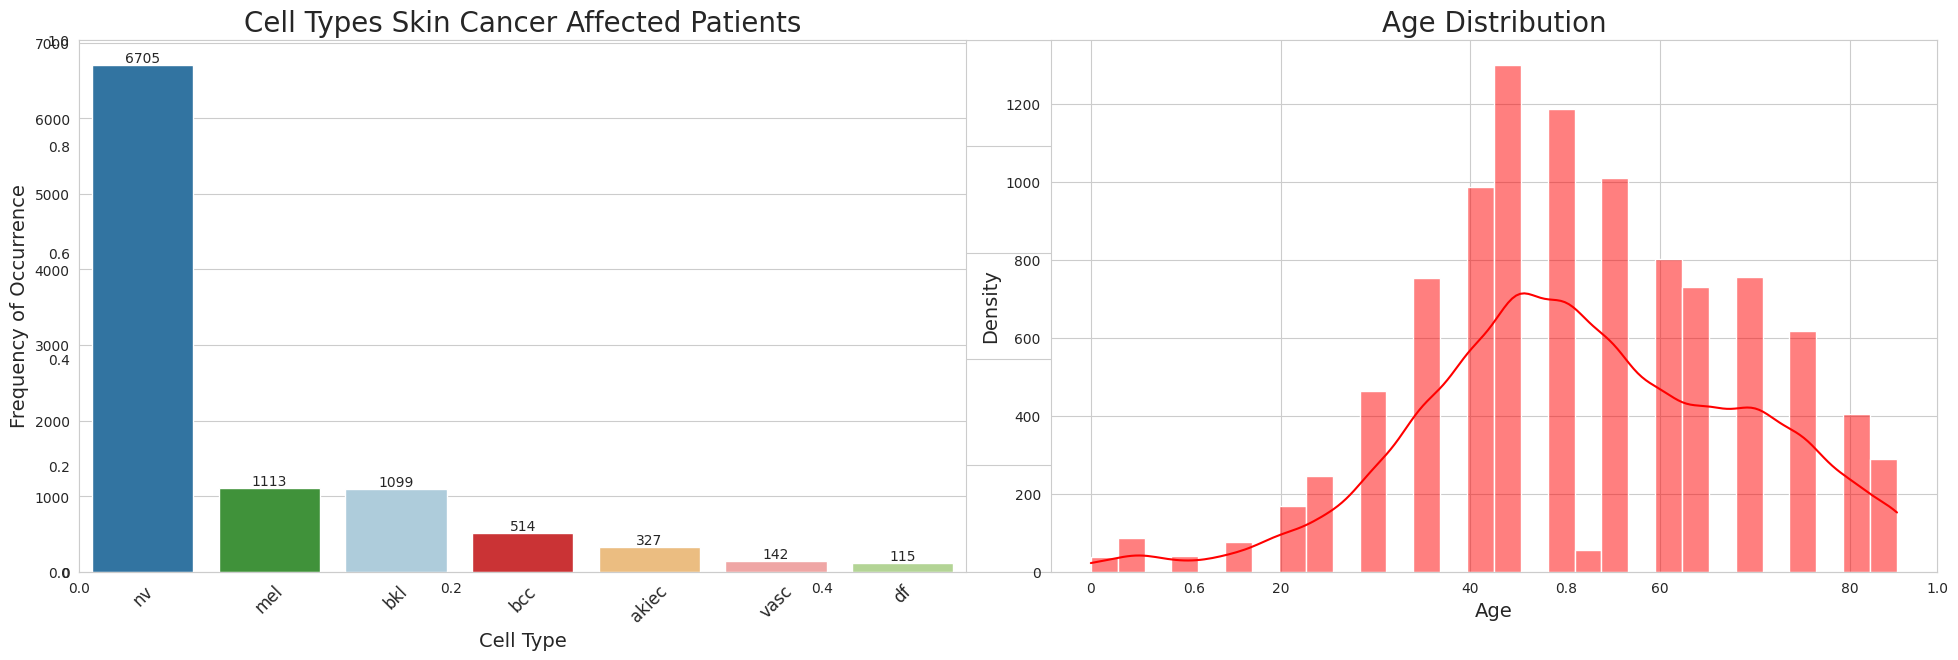

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style('whitegrid')

# Create the subplot figure
fig, axes = plt.subplots(figsize=(20, 7))

# -------- First subplot: Count of 'dx' --------
ax1 = fig.add_subplot(121)
sns.countplot(
    x='dx',
    hue='dx',  # Fix the FutureWarning
    data=df,
    order=df['dx'].value_counts().index,
    palette='Paired',
    legend=False,  # Suppress legend since hue is same as x
    ax=ax1
)

# Add value labels to bars
for container in ax1.containers:
    ax1.bar_label(container)

# Titles and labels
ax1.set_title('Cell Types Skin Cancer Affected Patients', fontsize=20)
ax1.set_xlabel('Cell Type', fontsize=14)
ax1.set_ylabel('Frequency of Occurrence', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=12)

# -------- Second subplot: Age distribution --------
ax4 = fig.add_subplot(122)
sns.histplot(df['age'], bins=30, kde=True, color='red', ax=ax4)  # Replaces distplot

ax4.set_title('Age Distribution', fontsize=20)
ax4.set_xlabel('Age', fontsize=14)
ax4.set_ylabel('Density', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df_new = df.iloc[:,[2, 6]]

In [ ]:
rafa = df_new.groupby("localization").value_counts().reset_index()

In [ ]:
# Rename the dataframe column
rafa = rafa.rename(columns={0: "count"})

In [ ]:
# Get the data fram for the count of each lesion type, localization
nv = rafa[rafa["dx"] == "nv"]
mel = rafa[rafa["dx"] == "mel"]
bkl = rafa[rafa["dx"] == "bkl"]
vasc = rafa[rafa["dx"] == "vasc"]
bcc = rafa[rafa["dx"] == "bcc"]
akiec = rafa[rafa["dx"] == "akiec"]
dfi = rafa[rafa["dx"] == "df"]

/tmp/ipython-input-2817657702.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x = "count",y = "localization",data = nv, palette='husl', order=nv.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
/tmp/ipython-input-2817657702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x = "count",y = "localization",data = mel, palette='husl', order=mel.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
/tmp/ipython-input-2817657702.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a

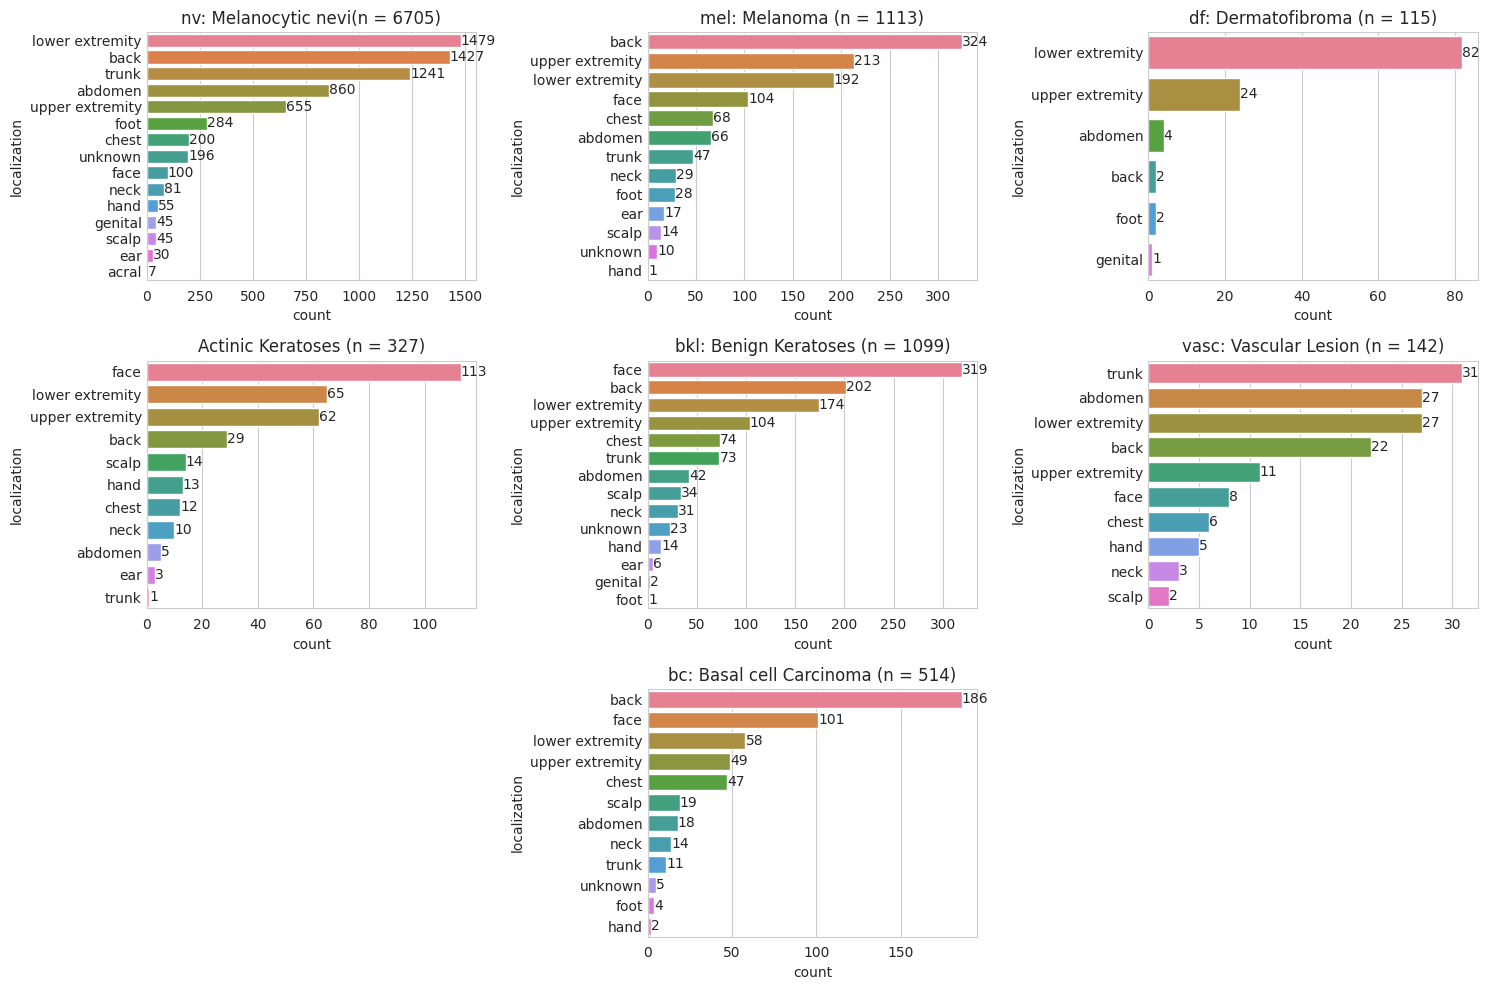

In [ ]:
# Getting a sense of the distribution of localization by diagnosis

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(331)
ax1 = sns.barplot(x = "count",y = "localization",data = nv, palette='husl', order=nv.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax1.containers:
    ax1.bar_label(i,)
ax1.tick_params(axis='y', length=0)
ax1.set_title('nv: Melanocytic nevi(n = 6705)')
plt.tight_layout();

ax2 = fig.add_subplot(332)
ax2 = sns.barplot(x = "count",y = "localization",data = mel, palette='husl', order=mel.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax2.containers:
    ax2.bar_label(i,)
ax2.tick_params(axis='y', length=0)
ax2.set_title('mel: Melanoma (n = 1113)')
plt.tight_layout();

ax3 = fig.add_subplot(333)
ax3 = sns.barplot(x = "count",y = "localization",data = dfi, palette='husl', order=dfi.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax3.containers:
    ax3.bar_label(i,)
ax3.tick_params(axis='y', length=0)
ax3.set_title('df: Dermatofibroma (n = 115)')
plt.tight_layout();


ax4 = fig.add_subplot(334)
ax4 = sns.barplot(x = "count",y = "localization",data = akiec, palette='husl', order=akiec.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax4.containers:
    ax4.bar_label(i,)
ax4.tick_params(axis='y', length=0)
ax4.set_title('Actinic Keratoses (n = 327)')
plt.tight_layout();

ax5 = fig.add_subplot(335)
ax5 = sns.barplot(x = "count",y = "localization",data = bkl, palette='husl', order= bkl.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax5.containers:
    ax5.bar_label(i,)
ax5.tick_params(axis='y', length=0)
ax5.set_title('bkl: Benign Keratoses (n = 1099)')
plt.tight_layout();

ax6 = fig.add_subplot(336)
ax6 = sns.barplot(x = "count",y = "localization",data = vasc, palette='husl', order= vasc.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax6.containers:
    ax6.bar_label(i,)
ax6.tick_params(axis='y', length=0)
ax6.set_title('vasc: Vascular Lesion (n = 142)')
plt.tight_layout();

ax7 = fig.add_subplot(338)
ax7 = sns.barplot(x = "count",y = "localization",data = bcc, palette='husl', order= bcc.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax7.containers:
    ax7.bar_label(i,)
ax7.tick_params(axis='y', length=0)
ax7.set_title('bc: Basal cell Carcinoma (n = 514)')
plt.tight_layout();


plt.tight_layout()
plt.show()



<Figure size 2000x500 with 0 Axes>

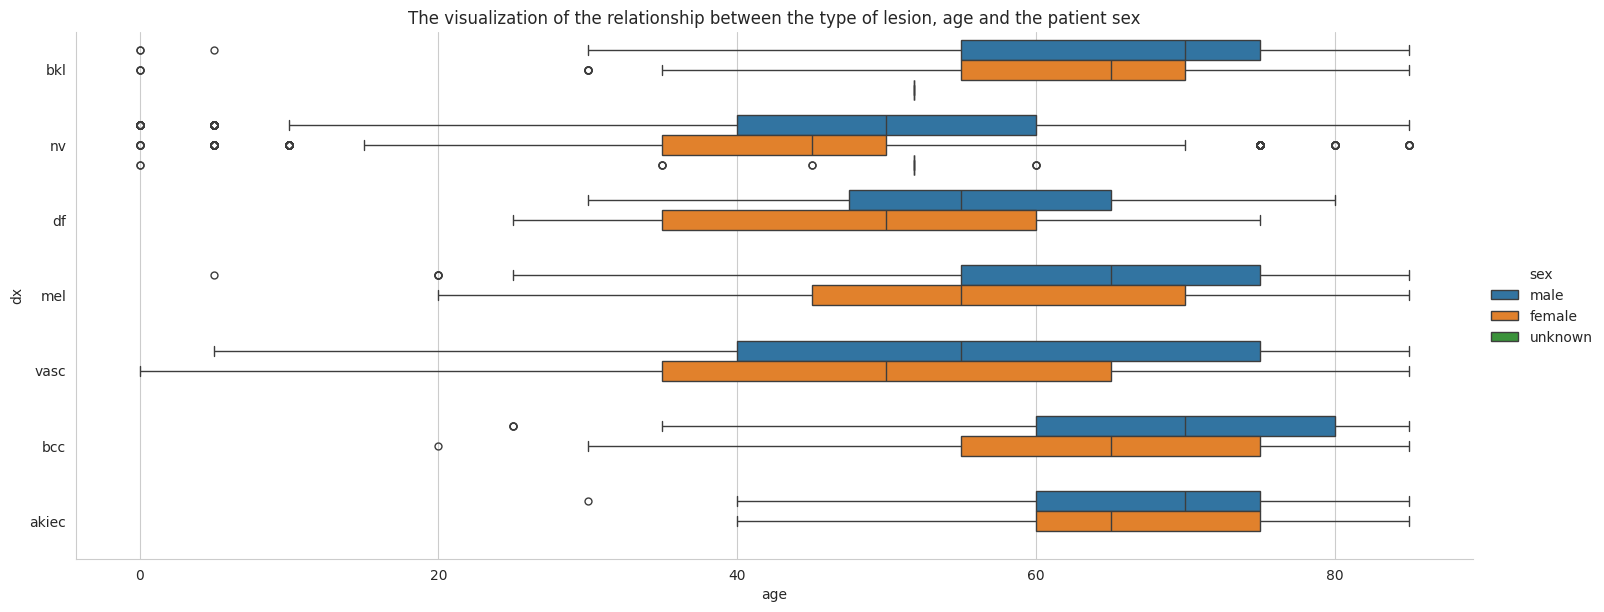

In [ ]:
# A plot of the relationship between the age, sex and lesion type
plt.figure(figsize=(20,5))
sns.catplot(y="dx", x="age", hue="sex",kind="box", height = 6, aspect = 2.5,  data=df).set(title='The visualization of the relationship between the type of lesion, age and the patient sex')
plt.show()

In [ ]:
mela = df[df["dx"] == "mel"]
mel_fem = mela[mela["sex"] == "female"]
mel_male = mela[mela["sex"] == "male"]
print("Median age of female with Melanoma is ", mel_fem["age"].median())
print("Median age of male with Melanoma is ", mel_male["age"].median())

Median age of female with Melanoma is  55.0
Median age of male with Melanoma is  65.0


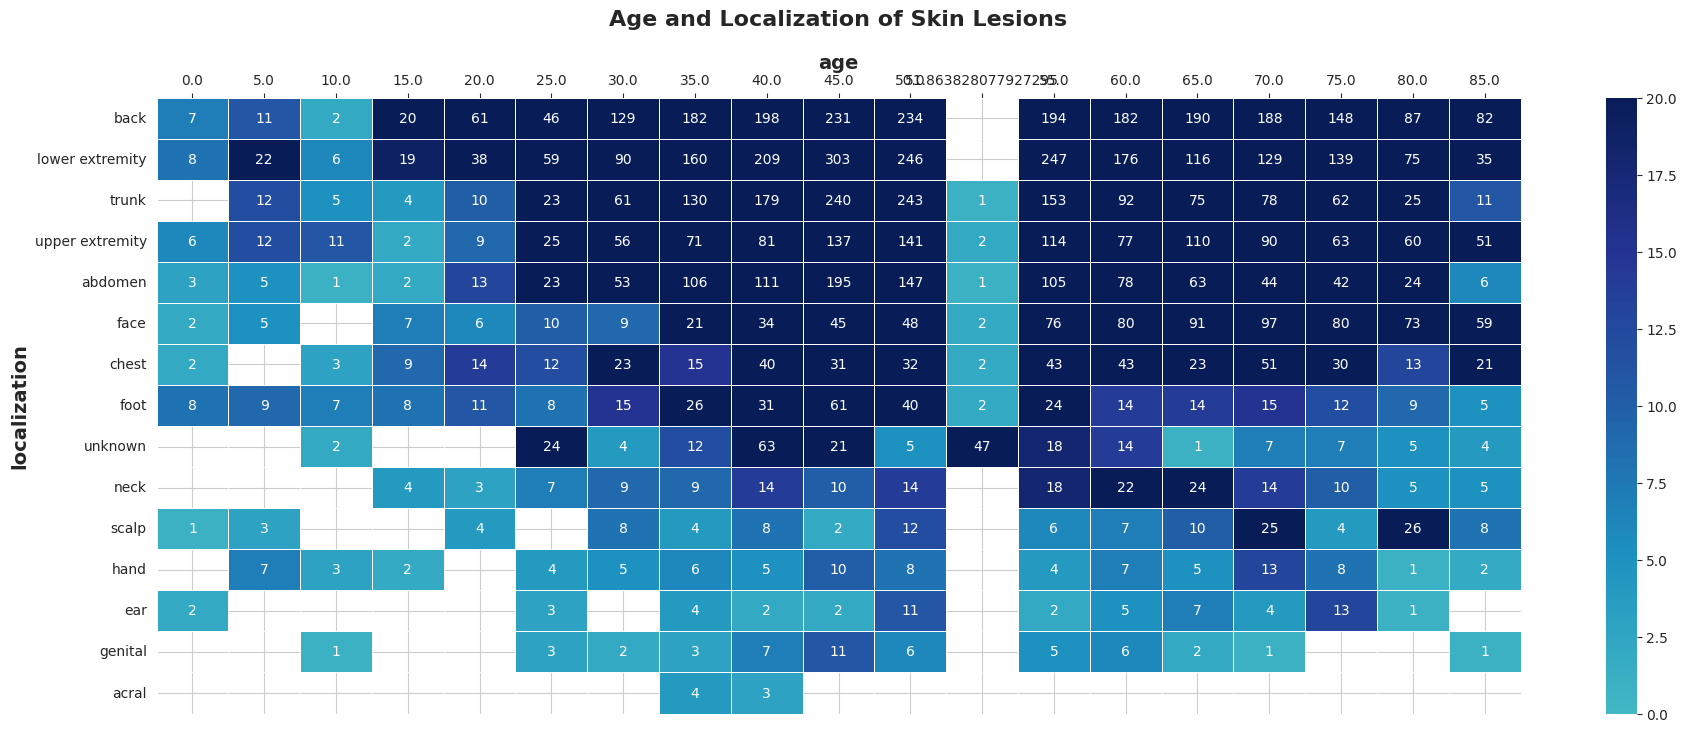

In [ ]:
# Heat Map Representation
skin_local = df.groupby(['localization']).size().sort_values(ascending=False, inplace=False).reset_index()
skin_local.columns = ['localization', 'count']
sort_by = skin_local['localization']

skin_local_age = df.groupby(['age','localization']).size().reset_index()
skin_local_age.columns = ['age', 'localization', 'count']
skin_local_age.sort_values( "count", ascending=False, inplace=True)

def heatmap(df, index,columns,values,vmax,sort_by,Title):
    df_wide = df.pivot(index=index, columns=columns, values=values)
    df_wide = df_wide.reindex(index=sort_by)
    plt.figure(figsize=(22,8))
    ax = sns.heatmap(df_wide, annot=True, fmt='.0f', yticklabels='auto', cmap=sns.color_palette("YlGnBu", as_cmap=True), center=.2,vmin = 0, vmax = vmax,linewidths=.5)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(columns,fontsize = 14,weight = 'bold')
    ax.set_ylabel(index,fontsize = 14,weight = 'bold')
    ax.set_title(Title,fontsize = 16,weight = 'bold',pad=20)
    plt.show()

heatmap(skin_local_age,'localization', 'age','count', 20,sort_by,'Age and Localization of Skin Lesions')

In [ ]:
#Define the lesion names in a list
lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

In [ ]:
lesion_img = df.groupby('lesion_id')['image_id']\
               .count()\
               .to_frame()

In [ ]:
# Encoding target values
lesion_type_dict = {
    'nv':'Melanocytic Nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'

}

In [ ]:
# Assign a numeric values to our target variables
lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

In [ ]:
# Create new columns named "cell_type" and "lesion_ID" to depict the ecoded target values
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['lesion_ID'] = df['dx'].map(lesion_ID_dict.get)

In [ ]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,lesion_ID
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis,2
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,Actinic keratoses,4
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,Actinic keratoses,4
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,Actinic keratoses,4
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,Actinic keratoses,4


In [ ]:
# Define the path
path = '/content/drive/MyDrive/hams/all_images'

In [ ]:
import glob # Add this line
import os

# Define the path
path = '/content/drive/MyDrive/hams/all_images'

# Reading the Image Path
images_path = {os.path.splitext(os.path.basename(x))[0]:
               x for x in glob.glob('/content/drive/MyDrive/hams/all_images/*.jpg')}

In [ ]:
len(images_path)

10015

In [ ]:
# Create a column for the path for each image.
df['path'] = df['image_id'].map(images_path.get)

In [ ]:
df


,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,lesion_ID,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis,2,/content/drive/MyDrive/hams/all_images/ISIC_00...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis,2,/content/drive/MyDrive/hams/all_images/ISIC_00...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis,2,/content/drive/MyDrive/hams/all_images/ISIC_00...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis,2,/content/drive/MyDrive/hams/all_images/ISIC_00...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis,2,/content/drive/MyDrive/hams/all_images/ISIC_00...
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,Actinic keratoses,4,/content/drive/MyDrive/hams/all_images/ISIC_00...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,Actinic keratoses,4,/content/drive/MyDrive/hams/all_images/ISIC_00...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,Actinic keratoses,4,/content/drive/MyDrive/hams/all_images/ISIC_00...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,Actinic keratoses,4,/content/drive/MyDrive/hams/all_images/ISIC_00...


In [ ]:
# Check for Image duplicate
num_unique_id = df["image_id"].nunique()

In [ ]:
# Print the number of unique image_id
print(f"There are {num_unique_id} unique image IDs in the dataset")

There are 10015 unique image IDs in the dataset


In [ ]:
# SetThe lesion_ID as y
y = df["lesion_ID"]

In [ ]:
# View the first 5 items on the y column
y.head()

,lesion_ID
0,2
1,2
2,2
3,2
4,2


In [ ]:
#Convert y to a float arrays
y = np.array(y)
print(y.shape)

(10015,)


In [ ]:
df["path"].head()

,path
0,/content/drive/MyDrive/hams/all_images/ISIC_00...
1,/content/drive/MyDrive/hams/all_images/ISIC_00...
2,/content/drive/MyDrive/hams/all_images/ISIC_00...
3,/content/drive/MyDrive/hams/all_images/ISIC_00...
4,/content/drive/MyDrive/hams/all_images/ISIC_00...


In [ ]:
# Define a function that reads and resizes the Images
def get_img(img_path):
  img = cv2.imread(img_path,1)
  img = cv2.resize(img, (224, 224))

  return img

In [ ]:
import os
import cv2
import numpy as np
import tqdm
from concurrent.futures import ThreadPoolExecutor

def process_image(img_name):
    img = cv2.imread(img_name, 1)
    if img is not None:
        return cv2.resize(img, (224, 224))
    return None

save_path = "/content/drive/MyDrive/processed_images.npy"

if os.path.exists(save_path):
    print("Loading preprocessed images...")
    x = np.load(save_path, allow_pickle=True)
else:
    print("Processing images with parallel loading...")
    with ThreadPoolExecutor(max_workers=8) as executor:  # use 8 threads
        results = list(tqdm.tqdm(executor.map(process_image, df['path'].values),
                                 total=len(df)))
    x = [img for img in results if img is not None]
    np.save(save_path, np.array(x))
    print("Images processed and saved to Google Drive!")



Loading preprocessed images...


In [ ]:
y = df["lesion_ID"].values
y = np.array(y)
print(f"Labels shape: {y.shape}")
print(f"Unique classes: {np.unique(y)}")
print(f"Class distribution before balancing: {np.bincount(y)}")

Labels shape: (10015,)
Unique classes: [0 1 2 3 4 5 6]
Class distribution before balancing: [6705 1113 1099  514  327  142  115]


In [ ]:
# === Augment per-class to reach TARGET_COUNT images, saving to disk (memory-safe) ===
import os
import math
from collections import Counter
from tqdm import tqdm
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- CONFIGURE ---
TARGET_COUNT = 1500
OUT_ROOT = "/content/drive/MyDrive/augmented_dataset"   # <-- change if you want another folder
IMG_SIZE = (224, 224)   # adjust to your model size
SAVE_FORMAT = "png"     # 'png' smaller lossless, 'jpg' also ok
RESCALE_TO_0_255 = True # set True if your images currently float in [0,1]; False if already 0-255 uint8

# ensure df has 'path' and 'lesion_ID' columns
# df['path'] should point to image file paths (absolute or relative to current runtime)
assert 'path' in df.columns and 'lesion_ID' in df.columns, "df must contain 'path' and 'lesion_ID'"

# --- make output dirs ---
os.makedirs(OUT_ROOT, exist_ok=True)
class_ids = sorted(df['lesion_ID'].unique())  # e.g. [0,1,2,3,4,5,6]
for cls in class_ids:
    os.makedirs(os.path.join(OUT_ROOT, str(int(cls))), exist_ok=True)

# --- save original images into class folders (if not already present) ---
print("Saving original images into per-class folders (skips existing files)...")
for i, row in tqdm(df.iterrows(), total=len(df)):
    src = row['path']
    cls = int(row['lesion_ID'])
    dst_dir = os.path.join(OUT_ROOT, str(cls))
    # Compose a deterministic filename
    base = os.path.splitext(os.path.basename(src))[0]
    dst_path = os.path.join(dst_dir, f"orig_{base}.{SAVE_FORMAT}")
    if os.path.exists(dst_path):
        continue
    try:
        img = Image.open(src).convert("RGB")
        if IMG_SIZE is not None:
            img = img.resize(IMG_SIZE)
        if RESCALE_TO_0_255:
            # if image might be float in [0,1], convert; usually PIL gives 0-255 already
            img = img
        img.save(dst_path, format=SAVE_FORMAT.upper())
    except Exception as e:
        # print and continue if some images fail
        print(f"Failed to save {src}: {e}")
        continue

# --- check current counts ---
def class_counts(root):
    counts = {}
    for cls in class_ids:
        cls_dir = os.path.join(root, str(int(cls)))
        counts[cls] = len([f for f in os.listdir(cls_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])
    return counts

counts = class_counts(OUT_ROOT)
print("Counts after saving originals:", counts)

# --- set up augmentation generator ---
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.12,
    height_shift_range=0.12,
    shear_range=0.12,
    zoom_range=0.12,
    horizontal_flip=True,
    brightness_range=(0.85, 1.15),
    fill_mode='nearest'
)

# To make generator, we will create a small array of images for each class,
# but we will not keep large arrays for all classes simultaneously.
# We'll loop through classes and create a per-class generator that saves images to disk.

print("\nGenerating augmentations to reach target per-class counts...")
for cls in class_ids:
    cls_dir = os.path.join(OUT_ROOT, str(int(cls)))
    current = len([f for f in os.listdir(cls_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])
    needed = TARGET_COUNT - current
    if needed <= 0:
        print(f"Class {cls}: already {current} images (>= {TARGET_COUNT}) — skipping augmentation.")
        continue

    print(f"Class {cls}: {current} images, generating {needed} more to reach {TARGET_COUNT} ...")
    # Load all images for this class (this is per-class only, usually small)
    file_list = [os.path.join(cls_dir, f) for f in os.listdir(cls_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]
    if len(file_list) == 0:
        print(f"  WARNING: no images found for class {cls} - skipping")
        continue

    # Create small numpy array of images for flow; keep dtype uint8 to reduce memory.
    imgs = []
    for p in file_list:
        try:
            im = Image.open(p).convert("RGB").resize(IMG_SIZE)
            arr = np.array(im)  # uint8 HWC
            imgs.append(arr)
        except Exception as e:
            print("  Failed to open:", p, e)

    imgs = np.array(imgs, dtype=np.uint8)
    # create the flow that will save augmented images to cls_dir
    gen = datagen.flow(
        imgs,
        batch_size=1,
        shuffle=True,
        save_to_dir=cls_dir,
        save_prefix=f"aug_{cls}_",
        save_format=SAVE_FORMAT
    )

    # iterate until we've generated 'needed' images
    generated = 0
    # gen yields augmented batches; calling next(gen) will *also* save files because of save_to_dir
    # but for safety count how many new files are created
    initial_files = set(os.listdir(cls_dir))
    pbar = tqdm(total=needed)
    while generated < needed:
        _ = next(gen)  # will save 1 augmented image to disk per call (batch_size=1)
        # check newly added file(s)
        new_files = set(os.listdir(cls_dir)) - initial_files
        added = len([f for f in new_files if f.lower().endswith(('.png','.jpg','.jpeg'))])
        if added > 0:
            generated += added
            initial_files.update(new_files)
            pbar.update(added)
        # safety: break if generator loops too long (shouldn't happen)
        if generated > needed + 10:
            break
    pbar.close()
    print(f"  Done class {cls}: now has {len(os.listdir(cls_dir))} files.")

# final counts
final = class_counts(OUT_ROOT)
print("\nFinal counts per class:", final)
print("Total images in dataset:", sum(final.values()))


Saving original images into per-class folders (skips existing files)...


100%|██████████| 10015/10015 [1:21:44<00:00,  2.04it/s]


Counts after saving originals: {np.int64(0): 6705, np.int64(1): 1500, np.int64(2): 1500, np.int64(3): 1500, np.int64(4): 1500, np.int64(5): 1500, np.int64(6): 1500}

Generating augmentations to reach target per-class counts...
Class 0: already 6705 images (>= 1500) — skipping augmentation.
Class 1: already 1500 images (>= 1500) — skipping augmentation.
Class 2: already 1500 images (>= 1500) — skipping augmentation.
Class 3: already 1500 images (>= 1500) — skipping augmentation.
Class 4: already 1500 images (>= 1500) — skipping augmentation.
Class 5: already 1500 images (>= 1500) — skipping augmentation.
Class 6: already 1500 images (>= 1500) — skipping augmentation.

Final counts per class: {np.int64(0): 6705, np.int64(1): 1500, np.int64(2): 1500, np.int64(3): 1500, np.int64(4): 1500, np.int64(5): 1500, np.int64(6): 1500}
Total images in dataset: 15705


In [ ]:
import os
import random
import shutil

# --- CONFIG ---
SRC_ROOT = "/content/drive/MyDrive/augmented_dataset" # This should be the root folder containing your class subfolders (e.g., '0', '1', etc.)
TARGET_PER_CLASS = 1500
MOVE_EXCESS_TO = None # Set to a folder path (e.g., 'excess_images') to move the excess instead of deleting; set to None to delete directly.

if MOVE_EXCESS_TO:
    os.makedirs(MOVE_EXCESS_TO, exist_ok=True)

# --- find classes ---
classes = [d for d in os.listdir(SRC_ROOT) if os.path.isdir(os.path.join(SRC_ROOT, d))]
print("Found classes:", classes)

# --- process each class ---
for cls in classes:
    cls_dir = os.path.join(SRC_ROOT, cls)
    files = [f for f in os.listdir(cls_dir) if os.path.isfile(os.path.join(cls_dir, f))]
    n = len(files)

    if n > TARGET_PER_CLASS:
        print(f"Class '{cls}' has {n} images - reducing to {TARGET_PER_CLASS}")

        # Randomly select a sample of images to KEEP
        # The 'random.sample' function is efficient for this
        keep = set(random.sample(files, TARGET_PER_CLASS))

        # Iterate through all files and remove those NOT in the 'keep' set
        for f in files:
            if f not in keep:
                src_path = os.path.join(cls_dir, f)
                if MOVE_EXCESS_TO:
                    dst_path = os.path.join(MOVE_EXCESS_TO, f"{cls}_{f}")
                    shutil.move(src_path, dst_path)
                else:
                    os.remove(src_path)
    else:
        print(f"Class '{cls}': {n} images - OK")

print("\nDone. Final counts may be checked by re-running the class_counts function.")

Found classes: ['0', '1', '2', '3', '4', '5', '6']
Class '0' has 6705 images - reducing to 1500
Class '1': 1500 images - OK
Class '2': 1500 images - OK
Class '3': 1500 images - OK
Class '4': 1500 images - OK
Class '5': 1500 images - OK
Class '6': 1500 images - OK

Done. Final counts may be checked by re-running the class_counts function.


Number of images per class:
Class 0: 1500
Class 1: 1500
Class 2: 1500
Class 3: 1500
Class 4: 1500
Class 5: 1500
Class 6: 1500


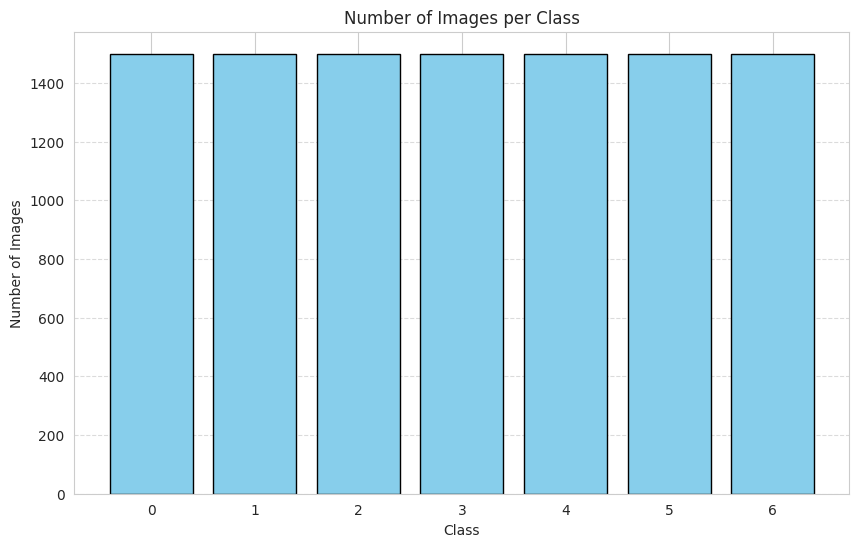

In [ ]:
import os
import matplotlib.pyplot as plt

# Path where your augmented dataset is stored
OUT_ROOT = "/content/drive/MyDrive/augmented_dataset"

# Get class counts
class_counts = {}
for cls in sorted(os.listdir(OUT_ROOT)):
    cls_dir = os.path.join(OUT_ROOT, cls)
    if os.path.isdir(cls_dir):
        count = len([f for f in os.listdir(cls_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])
        class_counts[cls] = count

# Print counts
print("Number of images per class:")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count}")

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue", edgecolor="black")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
import tensorflow as tf

# Same folder as your OUT_ROOT path
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_ds = tf.keras.utils.image_dataset_from_directory(
    OUT_ROOT,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Split Train / Val / Test
TRAIN_SIZE = 0.64
VAL_SIZE = 0.16
TEST_SIZE = 0.20

total_batches = tf.data.experimental.cardinality(train_ds).numpy()
train_batches = int(total_batches * TRAIN_SIZE)
val_batches = int(total_batches * VAL_SIZE)

train_ds_split = train_ds.take(train_batches)
val_ds_split = train_ds.skip(train_batches).take(val_batches)
test_ds_split = train_ds.skip(train_batches + val_batches)


Found 10500 files belonging to 7 classes.


In [ ]:
# Define split sizes
TRAIN_SIZE = 0.64
VAL_SIZE = 0.16
TEST_SIZE = 0.20

# Get the total number of batches
total_batches = tf.data.experimental.cardinality(train_ds).numpy()

# Calculate the number of batches for each split
train_batches = int(total_batches * TRAIN_SIZE)
val_batches = int(total_batches * VAL_SIZE)

# Create the new datasets
train_ds_split = train_ds.take(train_batches)
val_ds_split = train_ds.skip(train_batches).take(val_batches)
test_ds_split = train_ds.skip(train_batches + val_batches)

# Print the sizes of the new datasets
print(f"Number of training batches: {tf.data.experimental.cardinality(train_ds_split).numpy()}")
print(f"Number of validation batches: {tf.data.experimental.cardinality(val_ds_split).numpy()}")
print(f"Number of test batches: {tf.data.experimental.cardinality(test_ds_split).numpy()}")

Number of training batches: 210
Number of validation batches: 52
Number of test batches: 67


In [ ]:
import tensorflow as tf

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Load the entire dataset and infer labels from folder structure
full_ds = tf.keras.utils.image_dataset_from_directory(
    OUT_ROOT,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

TRAIN_SIZE = 0.64
VAL_SIZE = 0.16
TEST_SIZE = 0.20

total_batches = tf.data.experimental.cardinality(full_ds).numpy()
train_batches = int(total_batches * TRAIN_SIZE)
val_batches = int(total_batches * VAL_SIZE)

train_ds_split = full_ds.take(train_batches)
val_ds_split = full_ds.skip(train_batches).take(val_batches)
test_ds_split = full_ds.skip(train_batches + val_batches)

print("Dataset is already split into train_ds_split, val_ds_split, and test_ds_split.")


Found 10500 files belonging to 7 classes.
Dataset is already split into train_ds_split, val_ds_split, and test_ds_split.


In [ ]:
# ================== IMPORT RESNET50 DEPENDENCIES ==================
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
# ================== BUILD RESNET50 MODEL ==================
def build_resnet50_model(input_shape=(224, 224, 3), num_classes=7):
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base layers

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, outputs)
    return model, base_model

model, base_model = build_resnet50_model()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
callbacks = [
    ModelCheckpoint("best_model_frozen.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7, verbose=1)
]


In [ ]:
# ================== TRAINING PHASE 1: FROZEN BASE ==================
history_frozen = model.fit(
    train_ds_split,
    validation_data=val_ds_split,
    epochs=25,
    callbacks=callbacks
)


Epoch 1/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4849 - loss: 1.6226
Epoch 1: val_accuracy improved from -inf to 0.66286, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 523s 2s/step - accuracy: 0.4852 - loss: 1.6214 - val_accuracy: 0.6629 - val_loss: 0.9333 - learning_rate: 0.0010
Epoch 2/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6602 - loss: 0.9155
Epoch 2: val_accuracy improved from 0.66286 to 0.68750, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 29s 136ms/step - accuracy: 0.6602 - loss: 0.9154 - val_accuracy: 0.6875 - val_loss: 0.8178 - learning_rate: 0.0010
Epoch 3/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7168 - loss: 0.7672
Epoch 3: val_accuracy improved from 0.68750 to 0.71935, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - accuracy: 0.7167 - loss: 0.7672 - val_accuracy: 0.7194 - val_loss: 0.7566 - learning_rate: 0.0010
Epoch 4/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7389 - loss: 0.6848
Epoch 4: val_accuracy improved from 0.71935 to 0.73558, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.7389 - loss: 0.6849 - val_accuracy: 0.7356 - val_loss: 0.7231 - learning_rate: 0.0010
Epoch 5/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7742 - loss: 0.6146
Epoch 5: val_accuracy improved from 0.73558 to 0.73618, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.7742 - loss: 0.6147 - val_accuracy: 0.7362 - val_loss: 0.7059 - learning_rate: 0.0010
Epoch 6/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7791 - loss: 0.5738
Epoch 6: val_accuracy improved from 0.73618 to 0.74880, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.7790 - loss: 0.5739 - val_accuracy: 0.7488 - val_loss: 0.7011 - learning_rate: 0.0010
Epoch 7/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8065 - loss: 0.5274
Epoch 7: val_accuracy improved from 0.74880 to 0.76322, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.8065 - loss: 0.5275 - val_accuracy: 0.7632 - val_loss: 0.6652 - learning_rate: 0.0010
Epoch 8/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8092 - loss: 0.5087
Epoch 8: val_accuracy did not improve from 0.76322
210/210 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.8092 - loss: 0.5087 - val_accuracy: 0.7506 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 9/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8183 - loss: 0.4898
Epoch 9: val_accuracy did not improve from 0.76322
210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8183 - loss: 0.4898 - val_accuracy: 0.7584 - val_loss: 0.6637 - learning_rate: 0.0010
Epoch 10/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8265 - loss: 0.4530
Epoch 10: val_accuracy improved from 0.76322 to 0.76683, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8265 - loss: 0.4531 - val_accuracy: 0.7668 - val_loss: 0.6474 - learning_rate: 0.0010
Epoch 11/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8447 - loss: 0.4186
Epoch 11: val_accuracy improved from 0.76683 to 0.76743, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8447 - loss: 0.4186 - val_accuracy: 0.7674 - val_loss: 0.6660 - learning_rate: 0.0010
Epoch 12/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8425 - loss: 0.4231
Epoch 12: val_accuracy did not improve from 0.76743
210/210 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.8426 - loss: 0.4231 - val_accuracy: 0.7644 - val_loss: 0.6558 - learning_rate: 0.0010
Epoch 13/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8536 - loss: 0.3958
Epoch 13: val_accuracy improved from 0.76743 to 0.77284, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8536 - loss: 0.3958 - val_accuracy: 0.7728 - val_loss: 0.6461 - learning_rate: 0.0010
Epoch 14/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8578 - loss: 0.3787
Epoch 14: val_accuracy did not improve from 0.77284
210/210 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.8578 - loss: 0.3788 - val_accuracy: 0.7638 - val_loss: 0.6556 - learning_rate: 0.0010
Epoch 15/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8618 - loss: 0.3757
Epoch 15: val_accuracy improved from 0.77284 to 0.77885, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.8619 - loss: 0.3756 - val_accuracy: 0.7788 - val_loss: 0.6346 - learning_rate: 0.0010
Epoch 16/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8734 - loss: 0.3301
Epoch 16: val_accuracy did not improve from 0.77885
210/210 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8734 - loss: 0.3302 - val_accuracy: 0.7518 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 17/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8759 - loss: 0.3382
Epoch 17: val_accuracy did not improve from 0.77885
210/210 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.8759 - loss: 0.3382 - val_accuracy: 0.7620 - val_loss: 0.6845 - learning_rate: 0.0010
Epoch 18/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8812 - loss: 0.3196
Epoch 18: val_accuracy did not improve from 0.77885

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
210/210 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.8812 - loss: 0.3

210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.8959 - loss: 0.2994 - val_accuracy: 0.7933 - val_loss: 0.6490 - learning_rate: 5.0000e-04
Epoch 20/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9109 - loss: 0.2530
Epoch 20: val_accuracy did not improve from 0.79327
210/210 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9109 - loss: 0.2530 - val_accuracy: 0.7915 - val_loss: 0.6315 - learning_rate: 5.0000e-04
Epoch 21/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9182 - loss: 0.2400
Epoch 21: val_accuracy did not improve from 0.79327
210/210 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.9182 - loss: 0.2401 - val_accuracy: 0.7885 - val_loss: 0.6158 - learning_rate: 5.0000e-04
Epoch 22/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9159 - loss: 0.2268
Epoch 22: val_accuracy improved from 0.79327 to 0.79387, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9159 - loss: 0.2269 - val_accuracy: 0.7939 - val_loss: 0.6211 - learning_rate: 5.0000e-04
Epoch 23/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9251 - loss: 0.2175
Epoch 23: val_accuracy improved from 0.79387 to 0.79688, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9251 - loss: 0.2175 - val_accuracy: 0.7969 - val_loss: 0.6378 - learning_rate: 5.0000e-04
Epoch 24/25
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9168 - loss: 0.2256
Epoch 24: val_accuracy did not improve from 0.79688

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
210/210 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9168 - loss: 0.2257 - val_accuracy: 0.7957 - val_loss: 0.6267 - learning_rate: 5.0000e-04
Epoch 25/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9290 - loss: 0.1989
Epoch 25: val_accuracy improved from 0.79688 to 0.80889, saving model to best_model_frozen.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9290 - loss: 0.1989 - val_accuracy: 0.8089 - val_loss: 0.6238 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 21.


In [ ]:
# ================== TRAINING PHASE 2: FINE-TUNING ==================
base_model.trainable = True
for layer in base_model.layers[:-35]:
    layer.trainable = False  # Unfreeze last 35 layers

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

finetune_callbacks = [
    ModelCheckpoint("best_model_finetuned.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1),
    EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-8, verbose=1)
]

history_finetune = model.fit(
    train_ds_split,
    validation_data=val_ds_split,
    epochs=35,
    callbacks=finetune_callbacks
)


Epoch 1/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7378 - loss: 0.8099
Epoch 1: val_accuracy improved from -inf to 0.77344, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 49s 133ms/step - accuracy: 0.7379 - loss: 0.8095 - val_accuracy: 0.7734 - val_loss: 0.7406 - learning_rate: 1.0000e-04
Epoch 2/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8754 - loss: 0.3639
Epoch 2: val_accuracy improved from 0.77344 to 0.82031, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.8755 - loss: 0.3638 - val_accuracy: 0.8203 - val_loss: 0.5467 - learning_rate: 1.0000e-04
Epoch 3/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9337 - loss: 0.1965
Epoch 3: val_accuracy improved from 0.82031 to 0.82692, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.9337 - loss: 0.1965 - val_accuracy: 0.8269 - val_loss: 0.5735 - learning_rate: 1.0000e-04
Epoch 4/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9508 - loss: 0.1456
Epoch 4: val_accuracy improved from 0.82692 to 0.83594, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 25s 121ms/step - accuracy: 0.9509 - loss: 0.1455 - val_accuracy: 0.8359 - val_loss: 0.5547 - learning_rate: 1.0000e-04
Epoch 5/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9677 - loss: 0.0995
Epoch 5: val_accuracy improved from 0.83594 to 0.84375, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 108ms/step - accuracy: 0.9677 - loss: 0.0995 - val_accuracy: 0.8438 - val_loss: 0.5757 - learning_rate: 1.0000e-04
Epoch 6/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9683 - loss: 0.0835
Epoch 6: val_accuracy improved from 0.84375 to 0.84796, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - accuracy: 0.9683 - loss: 0.0836 - val_accuracy: 0.8480 - val_loss: 0.5251 - learning_rate: 1.0000e-04
Epoch 7/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9841 - loss: 0.0534
Epoch 7: val_accuracy improved from 0.84796 to 0.85577, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.9841 - loss: 0.0534 - val_accuracy: 0.8558 - val_loss: 0.5267 - learning_rate: 1.0000e-04
Epoch 8/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9882 - loss: 0.0446
Epoch 8: val_accuracy improved from 0.85577 to 0.85998, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.9882 - loss: 0.0446 - val_accuracy: 0.8600 - val_loss: 0.5253 - learning_rate: 1.0000e-04
Epoch 9/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9873 - loss: 0.0423
Epoch 9: val_accuracy did not improve from 0.85998
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.9873 - loss: 0.0423 - val_accuracy: 0.8251 - val_loss: 0.6947 - learning_rate: 1.0000e-04
Epoch 10/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9742 - loss: 0.0774
Epoch 10: val_accuracy did not improve from 0.85998
210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.9742 - loss: 0.0774 - val_accuracy: 0.8540 - val_loss: 0.5801 - learning_rate: 1.0000e-04
Epoch 11/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9799 - loss: 0.0590
Epoch 11: val_accuracy did not improve from 0.85998

Epoch 11: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.97

210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.9868 - loss: 0.0418 - val_accuracy: 0.8606 - val_loss: 0.4971 - learning_rate: 5.0000e-05
Epoch 13/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9954 - loss: 0.0178
Epoch 13: val_accuracy improved from 0.86058 to 0.86659, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9954 - loss: 0.0178 - val_accuracy: 0.8666 - val_loss: 0.5161 - learning_rate: 5.0000e-05
Epoch 14/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9958 - loss: 0.0160
Epoch 14: val_accuracy did not improve from 0.86659
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.9958 - loss: 0.0160 - val_accuracy: 0.8630 - val_loss: 0.5008 - learning_rate: 5.0000e-05
Epoch 15/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9990 - loss: 0.0068
Epoch 15: val_accuracy improved from 0.86659 to 0.87380, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.9990 - loss: 0.0068 - val_accuracy: 0.8738 - val_loss: 0.4836 - learning_rate: 5.0000e-05
Epoch 16/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9975 - loss: 0.0107
Epoch 16: val_accuracy did not improve from 0.87380
210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.9975 - loss: 0.0107 - val_accuracy: 0.8624 - val_loss: 0.5049 - learning_rate: 5.0000e-05
Epoch 17/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9966 - loss: 0.0108
Epoch 17: val_accuracy did not improve from 0.87380
210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.8642 - val_loss: 0.5331 - learning_rate: 5.0000e-05
Epoch 18/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9964 - loss: 0.0112
Epoch 18: val_accuracy did not improve from 0.87380
210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.8738 - val_loss: 0.4959 - learning_rate:


Epoch 20: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - accuracy: 0.9993 - loss: 0.0052 - val_accuracy: 0.8822 - val_loss: 0.5082 - learning_rate: 5.0000e-05
Epoch 21/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9992 - loss: 0.0054
Epoch 21: val_accuracy did not improve from 0.88221
210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.9992 - loss: 0.0054 - val_accuracy: 0.8792 - val_loss: 0.5343 - learning_rate: 2.5000e-05
Epoch 22/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 22: val_accuracy did not improve from 0.88221
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8798 - val_loss: 0.5203 - learning_rate: 2.5000e-05
Epoch 23/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9993 - loss: 0.0034
Epoch 23: val_accuracy improved from 0.88221 to 0.88462, saving model to best_model_finetuned.h5


210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.8846 - val_loss: 0.5065 - learning_rate: 2.5000e-05
Epoch 24/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9995 - loss: 0.0032
Epoch 24: val_accuracy did not improve from 0.88462
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.8798 - val_loss: 0.5212 - learning_rate: 2.5000e-05
Epoch 25/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9995 - loss: 0.0028
Epoch 25: val_accuracy improved from 0.88462 to 0.88522, saving model to best_model_finetuned.h5



Epoch 25: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.8852 - val_loss: 0.5202 - learning_rate: 2.5000e-05
Epoch 26/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9999 - loss: 0.0021
Epoch 26: val_accuracy did not improve from 0.88522
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.9999 - loss: 0.0021 - val_accuracy: 0.8810 - val_loss: 0.5229 - learning_rate: 1.2500e-05
Epoch 27/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9993 - loss: 0.0024
Epoch 27: val_accuracy did not improve from 0.88522
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.8828 - val_loss: 0.4973 - learning_rate: 1.2500e-05
Epoch 28/35
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9999 - loss: 0.0018
Epoch 28: val_accuracy did not improve from 0.88522
210/210 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds_split, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


67/67 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8509 - loss: 0.5393
Test Loss: 0.5100
Test Accuracy: 0.8568


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━

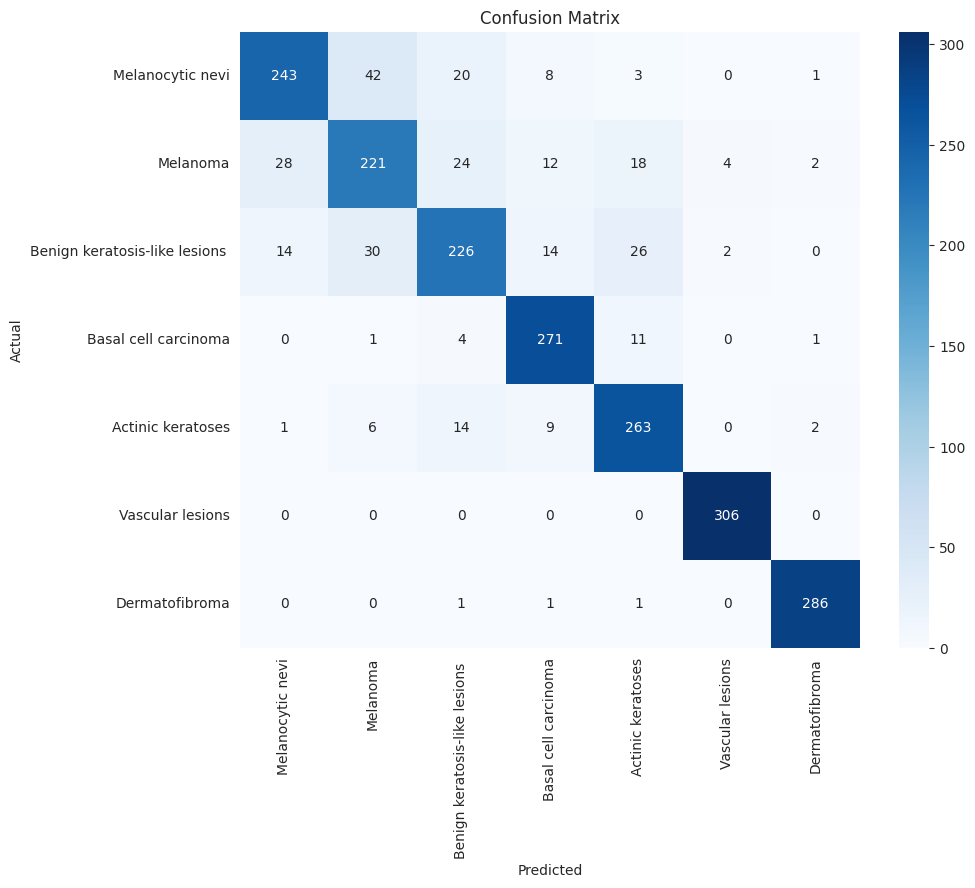

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds_split:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Assuming your class names list is called lesion_names
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=lesion_names))

# Confusion matrix plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=lesion_names, yticklabels=lesion_names, cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()


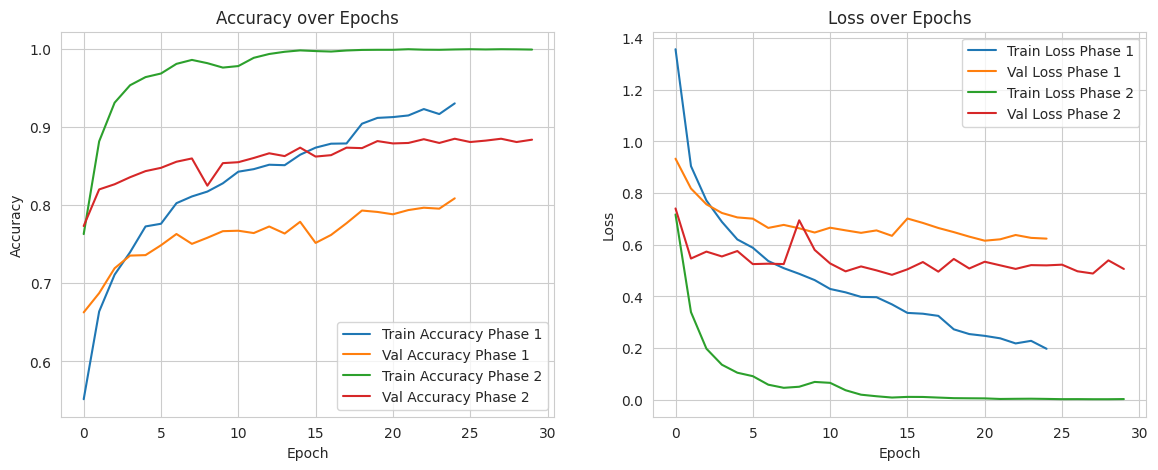

In [ ]:
def plot_training_history(history1, history2):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Train Accuracy Phase 1')
    plt.plot(history1.history['val_accuracy'], label='Val Accuracy Phase 1')
    plt.plot(history2.history['accuracy'], label='Train Accuracy Phase 2')
    plt.plot(history2.history['val_accuracy'], label='Val Accuracy Phase 2')
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Train Loss Phase 1')
    plt.plot(history1.history['val_loss'], label='Val Loss Phase 1')
    plt.plot(history2.history['loss'], label='Train Loss Phase 2')
    plt.plot(history2.history['val_loss'], label='Val Loss Phase 2')
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.show()

# Call with your saved history objects
plot_training_history(history_frozen, history_finetune)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


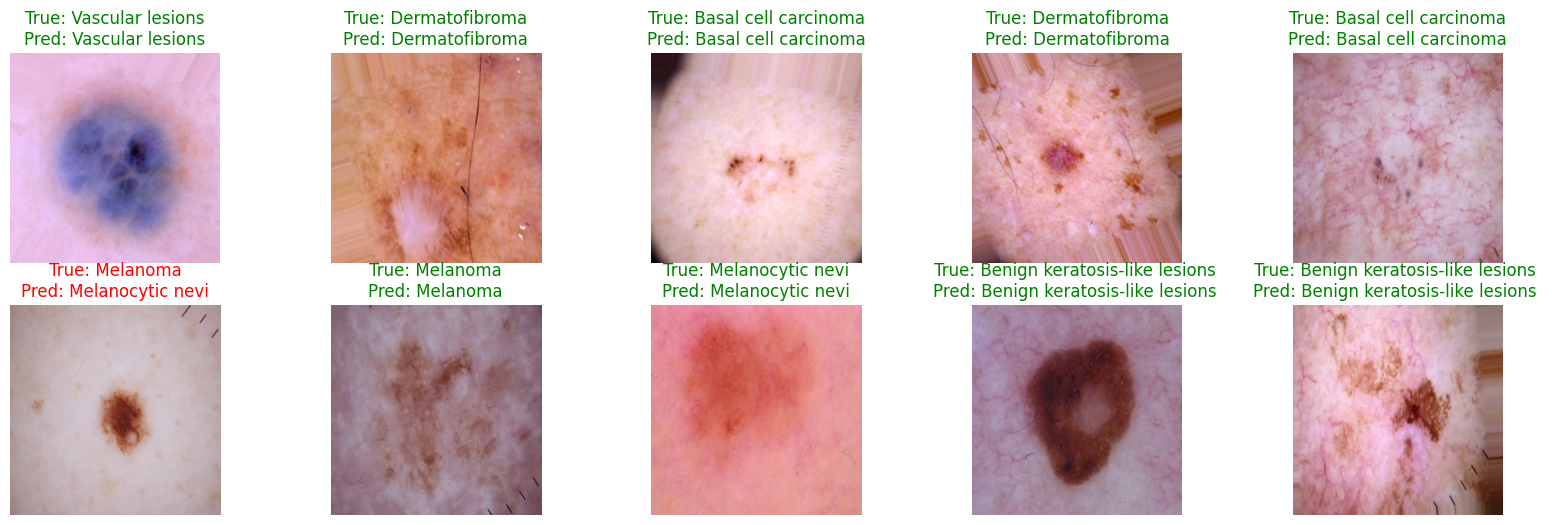

In [ ]:
def visualize_predictions(model, dataset, class_names, num_images=10):
    import matplotlib.pyplot as plt
    import numpy as np

    for images, labels in dataset.take(1):
        preds = model.predict(images)
        preds_labels = np.argmax(preds, axis=1)
        plt.figure(figsize=(20, 6))
        for i in range(num_images):
            plt.subplot(2, 5, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[labels[i].numpy()]
            pred_label = class_names[preds_labels[i]]
            color = "green" if true_label == pred_label else "red"
            plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
            plt.axis("off")
        plt.show()

# Usage:
visualize_predictions(model, test_ds_split, lesion_names, num_images=10)


In [ ]:
# Save the complete model
model.save('my_model.h5')        # Saves as a single HDF5 file
# or
model.save('my_model.keras')     # Recommended newer format

# To load it later
from tensorflow.keras.models import load_model
model = load_model('my_model.h5')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save to your Drive
model.save('/content/drive/MyDrive/my_model.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/MyDrive/my_model.keras')


In [ ]:
from tensorflow import keras

# Use model.export() to save in SavedModel format
model.export("my_model")

!zip -r my_model.zip my_model
from google.colab import files
files.download("my_model.zip")

Saved artifact at 'my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')]
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  135035552767760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552764112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552769872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552767184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552767376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552770256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552763344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552766608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552769488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552766992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135035552765264

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install tensorflow-addons


ERROR: Could not find a version that satisfies the requirement tensorflow-addons (from versions: none)
ERROR: No matching distribution found for tensorflow-addons


In [ ]:
!pip install vit-keras


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate, GlobalAveragePooling2D, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import vit_keras as vk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Build ViT branch
def build_vit(input_shape=(224, 224, 3), num_classes=7):
    vit_model = vk.ViT(
        image_size=input_shape[0],
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        activation=None
    )
    inputs = Input(shape=input_shape)
    x = vit_model(inputs)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.3)(x)
    vit_output = Dense(512, activation='relu')(x)
    return inputs, vit_output

In [ ]:
# Build hybrid model combining ResNet50 and ViT
def build_hybrid_model(input_shape=(224, 224, 3), num_classes=7):
    # ResNet50 branch
    base_resnet = tf.keras.applications.ResNet50(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    resnet_input = base_resnet.input
    x1 = base_resnet.output
    x1 = GlobalAveragePooling2D()(x1)
    x1 = Dropout(0.3)(x1)
    resnet_feat = Dense(512, activation='relu')(x1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import (
    Dense, Dropout, GlobalAveragePooling2D,
    Concatenate, Flatten, MultiHeadAttention, LayerNormalization
)
from tensorflow.keras.optimizers import Adam

# --- Custom patch extraction layer ---
class PatchExtract(layers.Layer):
    def __init__(self, patch_size=16):
        super().__init__()
        self.patch_size = patch_size

    def build(self, input_shape):
        self.num_patches_x = input_shape[1] // self.patch_size
        self.num_patches_y = input_shape[2] // self.patch_size
        self.patch_dim = input_shape[3] * (self.patch_size ** 2)

    def call(self, images):
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        batch_size = tf.shape(images)[0]
        patches = tf.reshape(
            patches, [batch_size, self.num_patches_x * self.num_patches_y, self.patch_dim]
        )
        return patches

# --- ViT branch ---
def simple_vit_branch(input_shape=(224, 224, 3), patch_size=16, embed_dim=256, num_heads=4):
    vit_input = Input(shape=input_shape)
    x = PatchExtract(patch_size)(vit_input)
    x = Dense(embed_dim)(x)
    attn = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
    x = LayerNormalization()(x + attn)
    x = Flatten()(x)
    vit_feat = Dense(512, activation='relu')(x)
    return vit_input, vit_feat

# --- ResNet branch ---
def resnet_branch(input_shape=(224, 224, 3)):
    base_resnet = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    base_resnet.trainable = False
    resnet_input = base_resnet.input
    x = GlobalAveragePooling2D()(base_resnet.output)
    x = Dropout(0.3)(x)
    resnet_feat = Dense(512, activation='relu')(x)
    return resnet_input, resnet_feat

# --- Combine both branches ---
input_shape = (224, 224, 3)
num_classes = 7

resnet_input, resnet_feat = resnet_branch(input_shape)
vit_input, vit_feat = simple_vit_branch(input_shape)

# Concatenate features
combined = Concatenate()([resnet_feat, vit_feat])
x = Dropout(0.5)(combined)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# --- Build and compile hybrid model ---
model = Model(inputs=[resnet_input, vit_input], outputs=output)
model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_8[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 51,840,903 (197.76 MB)

 Trainable params: 28,253,191 (107.78 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Concatenate features
combined = Concatenate()([resnet_feat, vit_feat])
x = Dropout(0.5)(combined)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)



In [ ]:
# Hybrid model with two inputs (same image input twice)
input_shape = (224, 224, 3)
num_classes = 7

model = build_hybrid_model(input_shape, num_classes)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_10[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 51,840,903 (197.76 MB)

 Trainable params: 28,253,191 (107.78 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/hams"


all_images	       hmnist_28_28_L.csv    hmnist_8_8_L.csv
HAM10000_metadata.csv  hmnist_28_28_RGB.csv  hmnist_8_8_RGB.csv


In [ ]:
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Paths
img_dir = "/content/drive/MyDrive/hams/all_images"
meta_csv = "/content/drive/MyDrive/hams/HAM10000_metadata.csv"

# Load metadata
df = pd.read_csv(meta_csv)

# Add .jpg extension if missing
df['image_id'] = df['image_id'].apply(lambda x: x + '.jpg')

# Full image paths
df['path'] = df['image_id'].apply(lambda x: os.path.join(img_dir, x))

# Encode labels (diagnosis column)
label_names = df['dx'].unique()
label_map = {name: i for i, name in enumerate(label_names)}
df['label'] = df['dx'].map(label_map)

# Train-test split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Image loader
def preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = img / 255.0
    return img, label

train_data = tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['label'])).map(preprocess).batch(32)
val_data = tf.data.Dataset.from_tensor_slices((val_df['path'], val_df['label'])).map(preprocess).batch(32)

# Duplicate inputs for hybrid model (same image for both branches)
train_data = train_data.map(lambda x, y: ((x, x), y))
val_data = val_data.map(lambda x, y: ((x, x), y))

print("✅ Dataset ready! Classes:", label_map)


✅ Dataset ready! Classes: {'bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6}


In [ ]:
# 🔹 Normalize both inputs (ResNet + ViT branches)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = train_data.map(
    lambda x, y: ((normalization_layer(x[0]), normalization_layer(x[1])), y)
)
val_data = val_data.map(
    lambda x, y: ((normalization_layer(x[0]), normalization_layer(x[1])), y)
)

print("✅ Normalization applied successfully!")


✅ Normalization applied successfully!


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=25,
    callbacks=callbacks
)


Epoch 1/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6420 - loss: 1.1846

251/251 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.6420 - loss: 1.1843 - val_accuracy: 0.6695 - val_loss: 0.9629 - learning_rate: 1.0000e-04
Epoch 2/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6653 - loss: 0.9591

251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.6653 - loss: 0.9590 - val_accuracy: 0.6750 - val_loss: 0.9061 - learning_rate: 1.0000e-04
Epoch 3/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6768 - loss: 0.9038

251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.6769 - loss: 0.9038 - val_accuracy: 0.6790 - val_loss: 0.8660 - learning_rate: 1.0000e-04
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.6797 - loss: 0.8820 - val_accuracy: 0.6710 - val_loss: 0.9237 - learning_rate: 1.0000e-04
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.6924 - loss: 0.8780 - val_accuracy: 0.6945 - val_loss: 0.8934 - learning_rate: 1.0000e-04
Epoch 6/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6878 - loss: 0.8506

251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.6879 - loss: 0.8505 - val_accuracy: 0.7104 - val_loss: 0.7923 - learning_rate: 1.0000e-04
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.7027 - loss: 0.8254 - val_accuracy: 0.7104 - val_loss: 0.8450 - learning_rate: 1.0000e-04
Epoch 8/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7009 - loss: 0.8163

251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7010 - loss: 0.8163 - val_accuracy: 0.7314 - val_loss: 0.7744 - learning_rate: 1.0000e-04
Epoch 9/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.7073 - loss: 0.7976 - val_accuracy: 0.7264 - val_loss: 0.7896 - learning_rate: 1.0000e-04
Epoch 10/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7137 - loss: 0.7712

251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7138 - loss: 0.7712 - val_accuracy: 0.7344 - val_loss: 0.7537 - learning_rate: 1.0000e-04
Epoch 11/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7193 - loss: 0.7519

251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7193 - loss: 0.7519 - val_accuracy: 0.7449 - val_loss: 0.7146 - learning_rate: 1.0000e-04
Epoch 12/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.7230 - loss: 0.7463 - val_accuracy: 0.7429 - val_loss: 0.7179 - learning_rate: 1.0000e-04
Epoch 13/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.7286 - loss: 0.7199 - val_accuracy: 0.7404 - val_loss: 0.7282 - learning_rate: 1.0000e-04
Epoch 14/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7263 - loss: 0.7215

251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7263 - loss: 0.7214 - val_accuracy: 0.7479 - val_loss: 0.7125 - learning_rate: 1.0000e-04
Epoch 15/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7309 - loss: 0.7055

251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.7309 - loss: 0.7055 - val_accuracy: 0.7499 - val_loss: 0.7093 - learning_rate: 1.0000e-04
Epoch 16/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7306 - loss: 0.6930

251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.7307 - loss: 0.6930 - val_accuracy: 0.7514 - val_loss: 0.6874 - learning_rate: 1.0000e-04
Epoch 17/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.7438 - loss: 0.6707 - val_accuracy: 0.7489 - val_loss: 0.7007 - learning_rate: 1.0000e-04
Epoch 18/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7425 - loss: 0.6706

251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7426 - loss: 0.6706 - val_accuracy: 0.7569 - val_loss: 0.6869 - learning_rate: 1.0000e-04
Epoch 19/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.7472 - loss: 0.6561 - val_accuracy: 0.7494 - val_loss: 0.6875 - learning_rate: 1.0000e-04
Epoch 20/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7535 - loss: 0.6481

251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7535 - loss: 0.6481 - val_accuracy: 0.7569 - val_loss: 0.6835 - learning_rate: 1.0000e-04
Epoch 21/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.7522 - loss: 0.6441 - val_accuracy: 0.7494 - val_loss: 0.7054 - learning_rate: 1.0000e-04
Epoch 22/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.7597 - loss: 0.6371 - val_accuracy: 0.7444 - val_loss: 0.7040 - learning_rate: 1.0000e-04
Epoch 23/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.7602 - loss: 0.6137 - val_accuracy: 0.7514 - val_loss: 0.6956 - learning_rate: 1.0000e-04
Epoch 24/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.7745 - loss: 0.5920 - val_accuracy: 0.7599 - val_loss: 0.6852 - learning_rate: 2.0000e-05
Epoch 25/25
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7757 - loss: 0.5703

251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7757 - loss: 0.5703 - val_accuracy: 0.7589 - val_loss: 0.6766 - learning_rate: 2.0000e-05


In [ ]:
# Load best weights
model.load_weights('best_hybrid_model.h5')


In [ ]:
# Find and unfreeze the ResNet50 base
for layer in model.layers:
    if "resnet" in layer.name.lower():
        layer.trainable = True

# Or more selectively (last few ResNet layers)
for layer in model.layers[-30:]:
    layer.trainable = True

# Recompile with a smaller learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history2 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=callbacks
)


Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7778 - loss: 0.5595

251/251 ━━━━━━━━━━━━━━━━━━━━ 62s 158ms/step - accuracy: 0.7778 - loss: 0.5595 - val_accuracy: 0.7609 - val_loss: 0.6647 - learning_rate: 1.0000e-05
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.7896 - loss: 0.5378 - val_accuracy: 0.7644 - val_loss: 0.6664 - learning_rate: 1.0000e-05
Epoch 3/15
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7904 - loss: 0.5402

251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.7905 - loss: 0.5402 - val_accuracy: 0.7668 - val_loss: 0.6634 - learning_rate: 1.0000e-05
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.7906 - loss: 0.5383 - val_accuracy: 0.7634 - val_loss: 0.6646 - learning_rate: 1.0000e-05
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7921 - loss: 0.5299 - val_accuracy: 0.7664 - val_loss: 0.6677 - learning_rate: 1.0000e-05
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7954 - loss: 0.5307 - val_accuracy: 0.7644 - val_loss: 0.6659 - learning_rate: 1.0000e-05
Epoch 7/15
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7965 - loss: 0.5239

251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.7965 - loss: 0.5239 - val_accuracy: 0.7703 - val_loss: 0.6582 - learning_rate: 2.0000e-06
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.8063 - loss: 0.5181 - val_accuracy: 0.7688 - val_loss: 0.6583 - learning_rate: 2.0000e-06
Epoch 9/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7997 - loss: 0.5152 - val_accuracy: 0.7723 - val_loss: 0.6600 - learning_rate: 2.0000e-06
Epoch 10/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7986 - loss: 0.5135 - val_accuracy: 0.7703 - val_loss: 0.6593 - learning_rate: 2.0000e-06
Epoch 11/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7995 - loss: 0.5154 - val_accuracy: 0.7693 - val_loss: 0.6594 - learning_rate: 4.0000e-07
Epoch 12/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8038 - loss: 0.5148 - val_accuracy: 0.7698 - val_loss: 0.6592 - learning_rate: 4.0000e-07
Epoch 13/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - acc

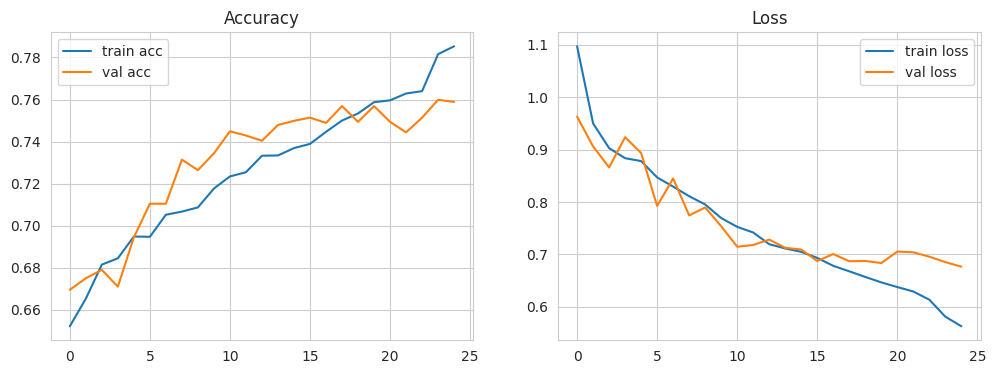

In [ ]:

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
final_train_acc = history2.history['accuracy'][-1]
final_val_acc = history2.history['val_accuracy'][-1]

print(f"✅ Final Training Accuracy: {final_train_acc*100:.2f}%")
print(f"✅ Final Validation Accuracy (Main Accuracy): {final_val_acc*100:.2f}%")


✅ Final Training Accuracy: 80.70%
✅ Final Validation Accuracy (Main Accuracy): 77.03%


In [ ]:
# Save final model
model.save('my_hybrid_model.h5')
model.save('my_hybrid_model.keras')

In [ ]:
model.save('/content/drive/MyDrive/my_hybrid_model.h5')
model.save('/content/drive/MyDrive/my_hybrid_model.keras')



In [ ]:

!zip -r my_hybrid_model.zip my_hybrid_model


	zip warning: name not matched: my_hybrid_model

zip error: Nothing to do! (try: zip -r my_hybrid_model.zip . -i my_hybrid_model)


In [ ]:
import os

# Create a folder for models in your Drive
os.makedirs('/content/drive/MyDrive/saved_models', exist_ok=True)


In [ ]:
!zip -r /content/drive/MyDrive/saved_models/my_resnet_model.zip /content/drive/MyDrive/saved_models/my_resnet_model
!zip -r /content/drive/MyDrive/saved_models/my_hybrid_model.zip /content/drive/MyDrive/saved_models/my_hybrid_model


	zip warning: name not matched: /content/drive/MyDrive/saved_models/my_resnet_model

zip error: Nothing to do! (try: zip -r /content/drive/MyDrive/saved_models/my_resnet_model.zip . -i /content/drive/MyDrive/saved_models/my_resnet_model)
	zip warning: name not matched: /content/drive/MyDrive/saved_models/my_hybrid_model

zip error: Nothing to do! (try: zip -r /content/drive/MyDrive/saved_models/my_hybrid_model.zip . -i /content/drive/MyDrive/saved_models/my_hybrid_model)


In [ ]:
model.save("/content/final_hybrid_model.keras")


In [ ]:
model.save("/content/final_hybrid_model.h5")


In [ ]:
!zip -r /content/final_hybrid_model.zip /content/final_hybrid_model.keras


updating: content/final_hybrid_model.keras (deflated 8%)


In [ ]:
!zip -r /content/final_hybrid_model.zip /content/final_hybrid_model.h5


  adding: content/final_hybrid_model.h5 (deflated 8%)


In [ ]:
from google.colab import files
files.download("/content/final_hybrid_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/final_hybrid_model.zip "/content/drive/MyDrive/final_hybrid_model.zip"
print("✅ Saved to Google Drive: MyDrive/final_hybrid_model.zip")


✅ Saved to Google Drive: MyDrive/final_hybrid_model.zip
